In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import simps
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt
import random
random.seed(1200)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DDP/Trelors_data.csv')
shape = df.shape


In [4]:
strains = df.Strain
stresses = df.Stress



In [5]:
energy = []
for i in range(df.shape[0]):
  energy_calc = simps(stresses[0:i+1],x=strains[0:i+1])
  energy.append(energy_calc)
df["Energy"] = energy

In [6]:
print(df)

    Stretch  Strain  Stress     Energy
0      1.00    0.00    0.00   0.000000
1      1.01    0.01    0.03   0.000150
2      1.12    0.12    0.14   0.013200
3      1.24    0.24    0.23   0.033827
4      1.39    0.39    0.32   0.077123
5      1.61    0.61    0.41   0.156216
6      1.89    0.89    0.50   0.285775
7      2.17    1.17    0.58   0.435526
8      2.42    1.42    0.67   0.592347
9      3.01    2.01    0.85   1.040941
10     3.58    2.58    1.04   1.577812
11     4.03    3.03    1.21   2.084045
12     4.76    3.76    1.58   3.093659
13     5.36    4.36    1.94   4.150487
14     5.76    4.76    2.29   4.982826
15     6.16    5.16    2.67   5.981071
16     6.40    5.40    3.02   6.647323
17     6.62    5.62    3.39   7.362829
18     6.87    5.87    3.75   8.247176
19     7.05    6.05    4.12   8.962196
20     7.16    6.16    4.47   9.423290
21     7.27    6.27    4.85   9.944652
22     7.43    6.43    5.21  10.744725
23     7.50    6.50    5.57  11.124117
24     7.61    6.61    6.

In [7]:
def min_fun(x,a,b,c,d,e,f,g,h):
  ans = []
  for i in range(len(lamda_x)):
    I1 = x[0][i]**2+x[1][i]**2+x[2][i]**2
    I2 = (x[0][i]*x[1][i])**2 + (x[1][i]*x[2][i])**2 + (x[2][i]*x[0][i])**2
    res = a*I1+b*I1**2+c*I1**3+d*I2+e*I2**2+f*I2**3+g*math.log(I1)+h*math.log(I2)
    ans.append(res)
  return ans

In [8]:

def calc_energy_arrudaboyce(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 1/2 
  C2 = 1/20
  C3 = 11/1050
  C4 = 19/7000
  C5 = 519/673750
  mu = 0.2424
  N = 20.25
  return mu*(C1*(I1-3)+(C2/N)*(I1**2-3**2)+(C3/N**2)*(I1**3-3**3)+(C4/N**3)*(I1**4-3**4)+(C5/N**4)*(I1**5-3**5))



In [9]:
def calc_energy_carroll(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  A =  0.1481
  B = 3.024*10**-7
  C = 0.06623
  return (A)*(I1) + (B)*(I1**4) + (C)*(math.sqrt(I2))

In [10]:
def calc_energy_gentthomas(l1,l2,l3):
  I1 = l1**2+l2**2+l3**2
  I2 = (l1*l2)**2+(l2*l3)**2+(l3*l1)**2
  C1 = 0.2837
  C2 = 2.81*10**-11
  return C1*(I1-3)+C2*math.log(I2/3)

In [11]:
lamda_x = df.Stretch.values
total_data_points = lamda_x.shape[0]
lamda_y = [1/math.sqrt(i) for i in lamda_x]
lamda_z = [1/math.sqrt(i) for i in lamda_x]

lamda_y = np.asarray(lamda_y)
lamda_z = np.asarray(lamda_z)

In [12]:
X = (lamda_x,lamda_y,lamda_z)
Y = []
for i in range(total_data_points):
    Y.append(df.Energy[i])

In [13]:
popt_ab, pcov = curve_fit(min_fun,X,Y,bounds=(0,np.inf))

In [14]:
popt_ab

array([1.11064737e-21, 2.75424212e-23, 1.43725065e-05, 8.83493412e-21,
       1.76874505e-02, 1.32370789e-03, 9.67638716e-20, 6.90739925e-22])

In [15]:
y_res = min_fun(X,*popt_ab)

Text(0, 0.5, 'Energy')

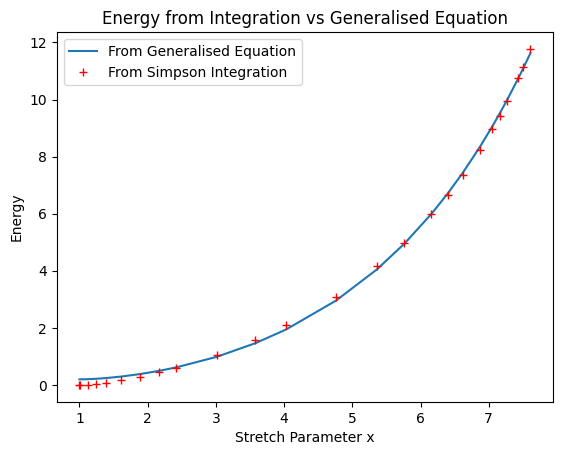

In [16]:
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy,'r+')
plt.legend(["From Generalised Equation","From Simpson Integration"])
plt.title("Energy from Integration vs Generalised Equation")
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")

In [17]:
energy_arrudaboyce = []
for i in range(len(lamda_x)):
  energy_arrudaboyce.append(calc_energy_arrudaboyce(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_arrudaboyce = np.asarray(energy_arrudaboyce)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

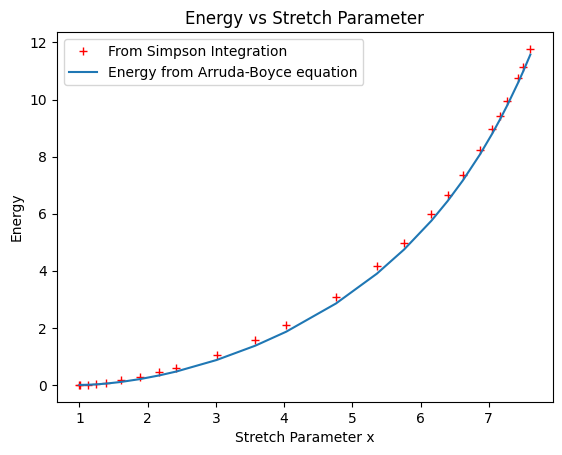

In [18]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_arrudaboyce)
plt.legend(["From Simpson Integration","Energy from Arruda-Boyce equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [19]:
energy_carroll = []
for i in range(len(lamda_x)):
  energy_carroll.append(calc_energy_carroll(lamda_x[i],lamda_y[i],lamda_z[i]))

energy_carroll = np.asarray(energy_carroll)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

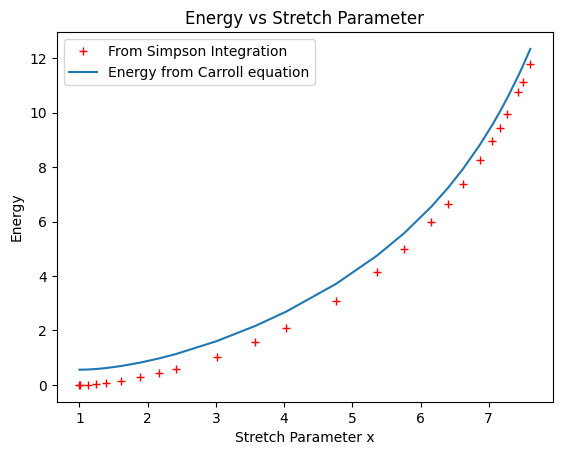

In [20]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_carroll)
plt.legend(["From Simpson Integration","Energy from Carroll equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

In [21]:
energy_gentthomas = []
for i in range(len(lamda_x)):
  energy_gentthomas.append(calc_energy_gentthomas(lamda_x[i],lamda_y[i],lamda_z[i]))
energy_gentthomas = np.asarray(energy_gentthomas)

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

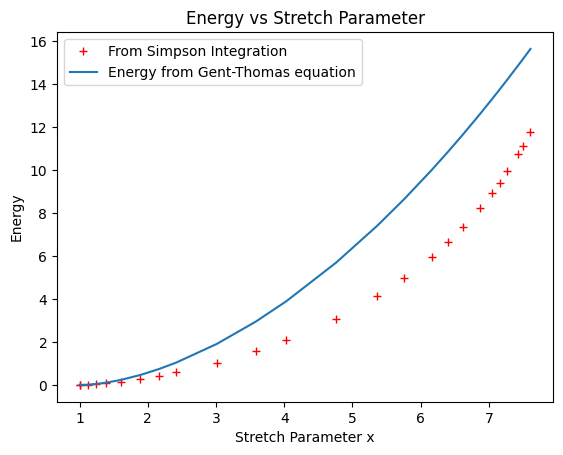

In [22]:
plt.plot(lamda_x,energy,"r+")
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")

Text(0.5, 1.0, 'Energy vs Stretch Parameter')

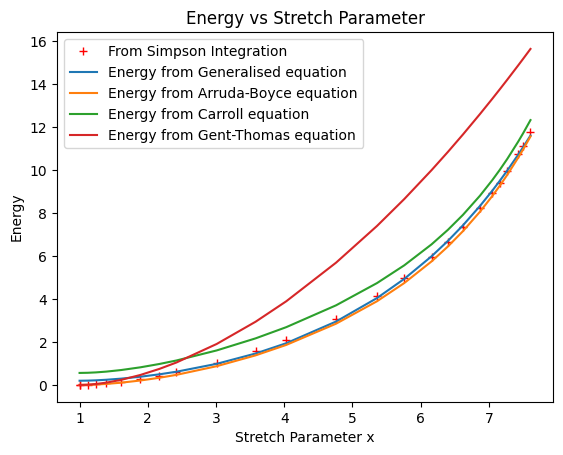

In [23]:
plt.plot(lamda_x,energy,'r+')
plt.plot(lamda_x,y_res)
plt.plot(lamda_x,energy_arrudaboyce)
plt.plot(lamda_x,energy_carroll)
plt.plot(lamda_x,energy_gentthomas)
plt.legend(["From Simpson Integration","Energy from Generalised equation","Energy from Arruda-Boyce equation","Energy from Carroll equation","Energy from Gent-Thomas equation"])
plt.xlabel("Stretch Parameter x")
plt.ylabel("Energy")
plt.title("Energy vs Stretch Parameter")